In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime

In [3]:
df=pd.read_csv("./vol00N/Vol093.00n",sep=' ',
               names=["hi","T(°C)","P(mbar)","l'humidité relative (%)"
                ," la vitesse (m/s)","la direction du vent", "g"
                ,"Cn2","Cn21"],skipinitialspace=True
               , index_col = False, header = None).drop_duplicates()
#df.loc[df.index[3]]
#df.loc[df.index[-1], 'hi']
df

,hi,T(°C),P(mbar),l'humidité relative (%),la vitesse (m/s),la direction du vent,g,Cn2,Cn21
0,3691,2150.0,793.0,9.9,16,0.0,0,3.510000e-14,5.500000e-14
1,3698,2150.3,793.0,9.7,16,0.0,0,1.170000e-13,6.480000e-14
2,3699,2151.6,792.9,9.8,15,1.5,270,3.260000e-14,1.780000e-14
3,3701,2154.8,792.6,10.0,14,1.5,270,5.740000e-14,4.170000e-14
4,3704,2163.6,791.7,11.0,10,1.5,270,5.150000e-14,6.000000e-14
...,...,...,...,...,...,...,...,...,...
3451,9280,29237.6,13.0,-47.9,2,19.9,287,1.290000e-19,7.140000e-20
3452,9282,29241.0,13.0,-47.8,3,19.9,287,1.220000e-19,1.590000e-19
3453,9283,29244.4,13.0,-47.8,3,19.9,287,7.700000e-19,5.370000e-20
3454,9285,29264.7,12.9,-47.7,3,19.9,287,7.740000e-20,1.100000e-19


In [8]:
Alt_ref = df['hi'][0]
CN_mean = []
CN_med = []
cn=[]
hi=[]
nb_lay = []
c = 0
for index in df.index:    

    if df['hi'][index]<= Alt_ref + 1000 and df['hi'][index] != df.loc[df.index[-1], 'hi']:
        hi.append(df['hi'][index])
        cn.append(df['Cn2'][index])
        
    elif df['hi'][index]<= Alt_ref + 1000 and df['hi'][index] == df.loc[df.index[-1], 'hi'] :
        CN_mean.append(np.mean(cn))            
        CN_med.append(np.median(cn))
        c = c + 1 
        nb_lay.append(c)
        break

    else:
        CN_mean.append(np.mean(cn))            
        CN_med.append(np.median(cn)) 
        c = c + 1 
        nb_lay.append(c)
        cn = []
        hi = []
        Alt_ref = df['hi'][index]
        hi.append(df['hi'][index])
        cn.append(df['Cn2'][index])

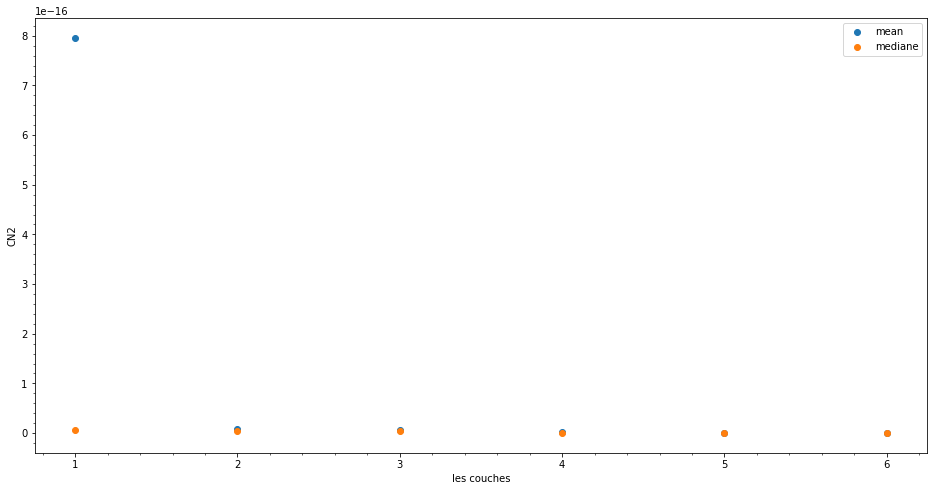

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
plt.scatter(nb_lay,CN_mean, label = 'mean')
plt.scatter(nb_lay,CN_med, label = 'mediane')
plt.xlabel('les couches')
plt.ylabel('CN2')
plt.legend()
plt.minorticks_on()
#plt.savefig("fig")